In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('data.csv')
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [ ]:
df.shape

(8518, 8)

In [ ]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Reviewer Name,10
Review Title,10
Place of Review,50
Up Votes,10
Down Votes,10
Month,465
Review text,8
Ratings,0


In [ ]:
df1=df[['Review text','Ratings']]
df1

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...
8513,NaN,5
8514,NaN,2
8515,NaN,4
8516,NaN,1


In [ ]:
df1.shape

(8518, 2)

In [ ]:
df1.isnull().sum()

,0
Review text,8
Ratings,0


In [ ]:
df1.dropna(inplace=True)

/tmp/ipython-input-3614008390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [ ]:
df1.shape

(8510, 2)

##Analyzing 'Rating' column

In [ ]:
df1['Ratings'].value_counts()

,count
Ratings,
5,5079
4,1744
1,766
3,615
2,306


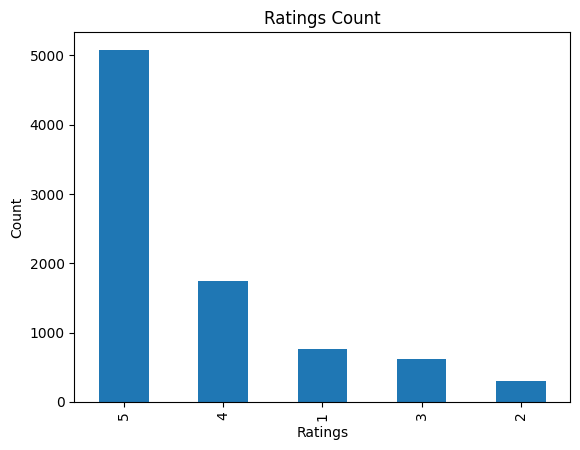

In [ ]:
df1['Ratings'].value_counts().plot(kind='bar')
plt.title('Ratings Count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


<Axes: ylabel='count'>

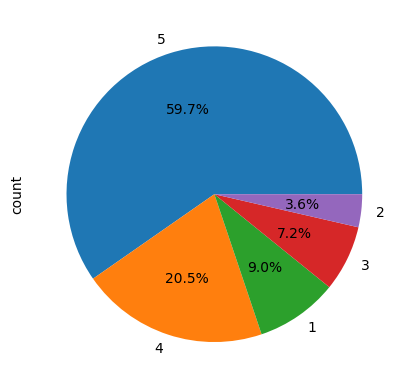

In [ ]:
df1['Ratings'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
round(df1['Ratings'].value_counts()/df1.shape[0]*100,2)

,count
Ratings,
5,59.68
4,20.49
1,9.00
3,7.23
2,3.60


In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')


cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df1['Review text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


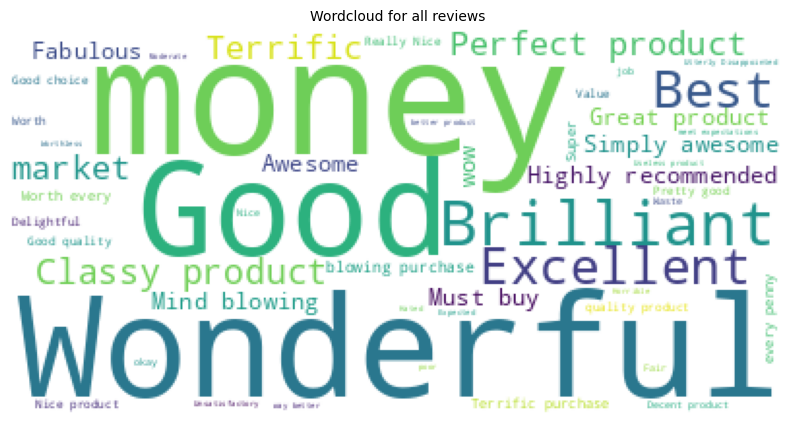

In [ ]:
from wordcloud import WordCloud


reviews = " ".join([str(review) for review in df['Review Title'].fillna('')])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

##Preprocessing

In [ ]:
#lower() for review text
df1['Review text']=df1['Review text'].str.lower()

/tmp/ipython-input-3071795472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Review text']=df1['Review text'].str.lower()


In [ ]:
#Removing punctuations
import string
exclude=string.punctuation

def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))

df1['Review text']=df1['Review text'].apply(remove_punc)

/tmp/ipython-input-2100511490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Review text']=df1['Review text'].apply(remove_punc)


In [ ]:
!pip install emoji

import emoji
def remove_emoji(text):
  return emoji.replace_emoji(text,'')

df1['Review text']=df1['Review text'].apply(remove_emoji)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 29.7 MB/s eta 0:00:00


/tmp/ipython-input-902697601.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Review text']=df1['Review text'].apply(remove_emoji)


In [ ]:
#stop words
from nltk.corpus import stopwords
stop_words=stopwords.words('english')


In [ ]:
def remove_stopwords(text):
  new_text=[]
  for word in text.split():
    if word in stop_words:
      new_text.append(' ')
    else:
      new_text.append(word)
  return " ".join(new_text)

df1['Review text']=df1['Review text'].apply(remove_stopwords)

/tmp/ipython-input-2848546918.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Review text']=df1['Review text'].apply(remove_stopwords)


In [ ]:
## stemmer

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

df1['Review text']=df1['Review text'].apply(stem_words)



/tmp/ipython-input-2172321035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Review text']=df1['Review text'].apply(stem_words)


In [ ]:
# Convert the Series into a list of strings
reviews = df1['Review text'].tolist()

# Tokenize each review into words
corpus = [str(review).split() for review in reviews]


print(corpus[:2])



[['nice', 'product', 'good', 'qualiti', 'price', 'rise', 'bad', 'sign', '800850', 'afford', 'price', 'especi', 'play', 'everyday', 'kindli', 'help', 'us', 'term', 'price', 'thank', 'youread'], ['didnt', 'suppli', 'yonex', 'mavi', '350', 'outsid', 'cover', 'yonex', 'ad', 'insid', 'cheapest', 'sad', 'hear', 'thisread']]


##Numerical Feature Extraction

In [ ]:
# cv = CountVectorizer(
#     max_features=5000,
#     ngram_range=(1,2),
#     min_df=5
# )

from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(ngram_range=(1,2), max_features=5000)




# Join the list of words back into a single string for each review
processed_reviews = [" ".join(review) for review in corpus]

X = cv.fit_transform(processed_reviews).toarray()

#Storing independent and dependent variables in X and y
X = cv.fit_transform(processed_reviews).toarray()

def rating_to_sentiment(r):
    if r <= 2:
        return 0   # Negative
    else:
        return 1   # Positive

df1['sentiment'] = df1['Ratings'].apply(rating_to_sentiment)
y = df1['sentiment']

/tmp/ipython-input-3948853929.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment'] = df1['Ratings'].apply(rating_to_sentiment)


In [ ]:
import pickle
pickle.dump(cv, open("vectorizer.pkl", "wb"))


In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (8510, 5000)
y shape: (8510,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (5957, 5000)
y train: (5957,)
X test: (2553, 5000)
y test: (2553,)


In [ ]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 1.0
X test max value: 1.0


In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import f1_score
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)
f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')

print("Train F1-Score:", f1_train)
print("Test  F1-Score :", f1_test)

Train F1-Score: 0.7705808296556425
Test  F1-Score : 0.7272590892043324


In [ ]:
y_pred= model_lr.predict(X_test)

In [ ]:
import pickle

pickle.dump(model_lr, open("sentiment_model.pkl", "wb"))



In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_nv = MultinomialNB()
model_nv.fit(X_train, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import f1_score
y_train_pred = model_nv.predict(X_train)
y_test_pred = model_nv.predict(X_test)
f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')

print("Train F1-Score:", f1_train)
print("Test  F1-Score :", f1_test)

Train F1-Score: 0.7698605384428814
Test  F1-Score : 0.6923022626337708


In [ ]:
y_pred = model_nv.predict(X_test)
